In [1]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_LR import PortfolioSimulator

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# List of assets to fetch data for
asset_list = ["NVDA", "TSLA", "AMZN", "META", "ADBE", "CRM", "AVGO", "LLY", "^TNX", "WELL"]  # Continue with your list of assets

# Define the start and end dates for fetching the data
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)  # Approximately 10 years

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Monte Carlo simulation configuration
weights = [.10, .10, .10, .10, .10, .10, .10, .10, .15, .05]  # Adjust based on the number of assets

# Initialize the PortfolioSimulator
sim_returns2 = PortfolioSimulator(
    portfolio_data=all_assets_df,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*30,
)

# # Display the first few rows of the portfolio data
display(sim_returns2.portfolio_data)



Fetching data for NVDA...
Fetching data for TSLA...
Fetching data for AMZN...
Fetching data for META...
Fetching data for ADBE...
Fetching data for CRM...
Fetching data for AVGO...
Fetching data for LLY...
Fetching data for ^TNX...
Fetching data for WELL...


NVDA                                                  \
                  open        high         low       close   adj close   
2014-05-07    4.562500    4.605000    4.517500    4.567500    4.328397   
2014-05-08    4.550000    4.697500    4.527500    4.625000    4.382885   
2014-05-09    4.485000    4.527500    4.427500    4.512500    4.276274   
2014-05-12    4.522500    4.655000    4.520000    4.645000    4.401840   
2014-05-13    4.582500    4.657500    4.555000    4.570000    4.330766   
...                ...         ...         ...         ...         ...   
2024-04-29  875.950012  879.919983  852.659973  877.570007  877.570007   
2024-04-30  872.400024  888.190002  863.000000  864.020020  864.020020   
2024-05-01  850.770020  860.000000  812.549988  830.409973  830.409973   
2024-05-02  844.489990  862.369995  832.000000  858.169983  858.169983   
2024-05-03  877.890015  892.809998  870.400085  887.890015  887.890015   

                                     TSLA                          ...  \
                volume ticker        open        high         low  ...   
2014-05-07  29390000.0   NVDA   13.976000   14.013333   13.150000  ...   
2014-05-08  43272800.0   NVDA   12.133333   12.960000   11.866667  ...   
2014-05-09  53953200.0   NVDA   11.990667   12.226667   11.814667  ...   
2014-05-12  29985600.0   NVDA   12.258000   12.479333   11.992000  ...   
2014-05-13  22110400.0   NVDA   12.250667   12.756000   12.200000  ...   
...                ...    ...         ...         ...         ...  ...   
2024-04-29  38897100.0   NVDA  188.419998  198.869995  184.539993  ...   
2024-04-30  36370900.0   NVDA  186.979996  190.949997  182.839996  ...   
2024-05-01  55986300.0   NVDA  182.000000  185.860001  179.009995  ...   
2024-05-02  37789800.0   NVDA  182.860001  184.600006  176.020004  ...   
2024-05-03  39595568.0   NVDA  182.009995  184.779999  178.539993  ...   

                ^TNX                     WELL                        \
           adj close volume ticker       open       high        low   
2014-05-07     2.590    0.0   ^TNX  63.410000  64.120003  63.389999   
2014-05-08     2.602    0.0   ^TNX  63.049999  64.389999  63.049999   
2014-05-09     2.623    0.0   ^TNX  64.220001  65.099998  64.099998   
2014-05-12     2.656    0.0   ^TNX  64.370003  64.419998  63.750000   
2014-05-13     2.618    0.0   ^TNX  64.250000  64.839996  63.720001   
...              ...    ...    ...        ...        ...        ...   
2024-04-29     4.614    0.0   ^TNX  95.089996  95.830002  94.620003   
2024-04-30     4.686    0.0   ^TNX  94.519997  98.190002  94.519997   
2024-05-01     4.595    0.0   ^TNX  95.019997  96.050003  94.139999   
2024-05-02     4.571    0.0   ^TNX  95.000000  96.190002  93.720001   
2024-05-03     4.500    0.0   ^TNX  96.959999  97.205002  94.660004   

                                                    
                close  adj close     volume ticker  
2014-05-07  63.630001  41.384666  2125100.0   WELL  
2014-05-08  64.309998  42.356129  2531300.0   WELL  
2014-05-09  64.389999  42.408821  2097200.0   WELL  
2014-05-12  64.309998  42.356129  1719500.0   WELL  
2014-05-13  64.000000  42.151958  1405100.0   WELL  
...               ...        ...        ...    ...  
2024-04-29  95.779999  95.779999  2607900.0   WELL  
2024-04-30  95.279999  95.279999  3879100.0   WELL  
2024-05-01  94.360001  94.360001  2283500.0   WELL  
2024-05-02  96.080002  96.080002  3129100.0   WELL  
2024-05-03  95.809998  95.809998  2100651.0   WELL  

[2515 rows x 70 columns]

NVDA                                                  \
                  open        high         low       close   adj close   
2014-05-07    4.562500    4.605000    4.517500    4.567500    4.328397   
2014-05-08    4.550000    4.697500    4.527500    4.625000    4.382885   
2014-05-09    4.485000    4.527500    4.427500    4.512500    4.276274   
2014-05-12    4.522500    4.655000    4.520000    4.645000    4.401840   
2014-05-13    4.582500    4.657500    4.555000    4.570000    4.330766   
...                ...         ...         ...         ...         ...   
2024-04-29  875.950012  879.919983  852.659973  877.570007  877.570007   
2024-04-30  872.400024  888.190002  863.000000  864.020020  864.020020   
2024-05-01  850.770020  860.000000  812.549988  830.409973  830.409973   
2024-05-02  844.489990  862.369995  832.000000  858.169983  858.169983   
2024-05-03  877.890015  892.809998  870.400085  887.890015  887.890015   

                                                TSLA              ...   ^TNX  \
                volume ticker log_return        open        high  ... ticker   
2014-05-07  29390000.0   NVDA        NaN   13.976000   14.013333  ...   ^TNX   
2014-05-08  43272800.0   NVDA   0.012510   12.133333   12.960000  ...   ^TNX   
2014-05-09  53953200.0   NVDA  -0.024625   11.990667   12.226667  ...   ^TNX   
2014-05-12  29985600.0   NVDA   0.028940   12.258000   12.479333  ...   ^TNX   
2014-05-13  22110400.0   NVDA  -0.016278   12.250667   12.756000  ...   ^TNX   
...                ...    ...        ...         ...         ...  ...    ...   
2024-04-29  38897100.0   NVDA   0.000251  188.419998  198.869995  ...   ^TNX   
2024-04-30  36370900.0   NVDA  -0.015561  186.979996  190.949997  ...   ^TNX   
2024-05-01  55986300.0   NVDA  -0.039676  182.000000  185.860001  ...   ^TNX   
2024-05-02  37789800.0   NVDA   0.032883  182.860001  184.600006  ...   ^TNX   
2024-05-03  39595568.0   NVDA   0.034046  182.009995  184.779999  ...   ^TNX   

                            WELL                                              \
           log_return       open       high        low      close  adj close   
2014-05-07        NaN  63.410000  64.120003  63.389999  63.630001  41.384666   
2014-05-08   0.004623  63.049999  64.389999  63.049999  64.309998  42.356129   
2014-05-09   0.008038  64.220001  65.099998  64.099998  64.389999  42.408821   
2014-05-12   0.012503  64.370003  64.419998  63.750000  64.309998  42.356129   
2014-05-13  -0.014411  64.250000  64.839996  63.720001  64.000000  42.151958   
...               ...        ...        ...        ...        ...        ...   
2024-04-29  -0.011850  95.089996  95.830002  94.620003  95.779999  95.779999   
2024-04-30   0.015484  94.519997  98.190002  94.519997  95.279999  95.279999   
2024-05-01  -0.019611  95.019997  96.050003  94.139999  94.360001  94.360001   
2024-05-02  -0.005237  95.000000  96.190002  93.720001  96.080002  96.080002   
2024-05-03  -0.015655  96.959999  97.205002  94.660004  95.809998  95.809998   

                                         
               volume ticker log_return  
2014-05-07  2125100.0   WELL        NaN  
2014-05-08  2531300.0   WELL   0.010630  
2014-05-09  2097200.0   WELL   0.001243  
2014-05-12  1719500.0   WELL  -0.001243  
2014-05-13  1405100.0   WELL  -0.004832  
...               ...    ...        ...  
2024-04-29  2607900.0   WELL   0.015149  
2024-04-30  3879100.0   WELL  -0.005234  
2024-05-01  2283500.0   WELL  -0.009703  
2024-05-02  3129100.0   WELL   0.018064  
2024-05-03  2100651.0   WELL  -0.002814  

[2515 rows x 80 columns]

In [2]:
log_returns = sim_returns2.portfolio_data.xs('log_return', level=1, axis=1)

# Statistical summary
print("Statistical Summary of Log Returns:")
print(log_returns.describe())

Statistical Summary of Log Returns:
              NVDA         TSLA         AMZN         META         ADBE  \
count  2514.000000  2514.000000  2514.000000  2514.000000  2514.000000   
mean      0.002096     0.001035     0.001012     0.000821     0.000841   
std       0.029305     0.034985     0.020603     0.023805     0.020556   
min      -0.207712    -0.236518    -0.151398    -0.306391    -0.183841   
25%      -0.011689    -0.015562    -0.008644    -0.009201    -0.007580   
50%       0.002385     0.001212     0.001176     0.001096     0.001386   
75%       0.016726     0.018014     0.011219     0.012234     0.010913   
max       0.218088     0.181445     0.132178     0.209307     0.163133   

               CRM         AVGO          LLY         ^TNX         WELL  
count  2514.000000  2514.000000  2514.000000  2514.000000  2514.000000  
mean      0.000673     0.001174     0.001002     0.000220     0.000163  
std       0.021585     0.022184     0.016887     0.030953     0.020227  
min  

c:\Users\kahbe\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


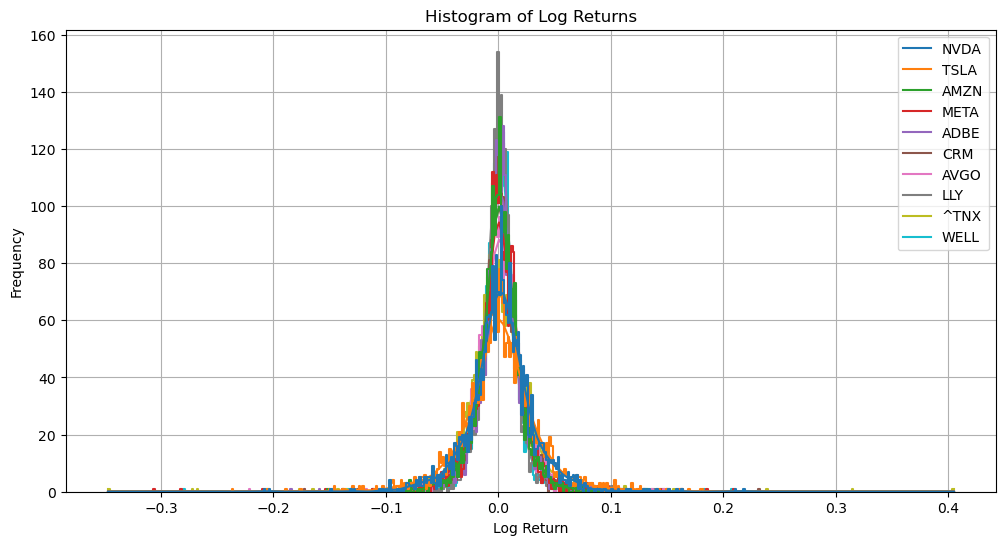

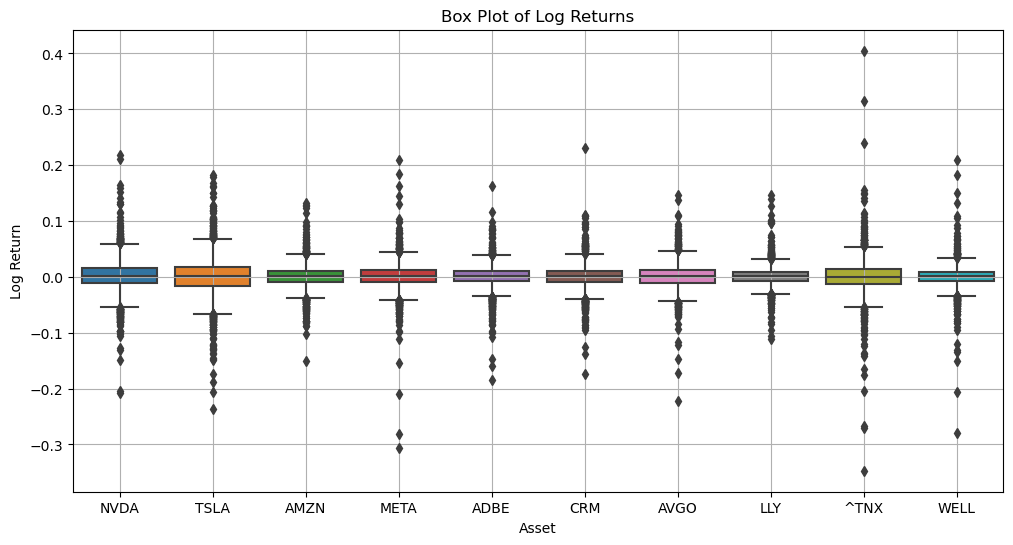


Skewness of Log Returns:
NVDA    0.120379
TSLA   -0.144703
AMZN    0.122829
META   -1.274017
ADBE   -0.635974
CRM     0.177653
AVGO   -0.424897
LLY     0.743341
^TNX    0.263321
WELL   -1.019799
dtype: float64

Kurtosis of Log Returns:
NVDA     6.580734
TSLA     4.589834
AMZN     5.944687
META    27.890203
ADBE     9.492641
CRM     10.454749
AVGO     9.337174
LLY     10.800005
^TNX    30.455882
WELL    32.196434
dtype: float64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram and density plot
plt.figure(figsize=(12, 6))
sns.histplot(log_returns, kde=True, element='step', fill=False)
plt.title('Histogram of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=log_returns)
plt.title('Box Plot of Log Returns')
plt.xlabel('Asset')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

# Optionally, check skewness and kurtosis to understand the tail behavior
print("\nSkewness of Log Returns:")
print(log_returns.skew())
print("\nKurtosis of Log Returns:")
print(log_returns.kurtosis())

In [2]:
display(sim_returns2.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 110.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 120.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 130.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 140.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 150.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 160.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 170.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 180.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 190.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 200.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 210.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 220.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 230.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 240.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 250.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 260.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 270.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 280.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 290.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 300.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 310.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 320.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 330.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 340.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 350.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 360.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 370.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 380.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 390.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 400.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 410.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 420.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 430.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 440.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 450.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 460.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 470.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 480.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

Running Monte Carlo simulation number 490.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998713,0.999429,1.004434,0.997169,1.002619,1.000325,0.999798,0.997843,0.996845,0.993758,...,1.000833,1.002816,1.000855,0.993063,1.011818,1.005945,0.997644,1.000806,0.998198,1.001531
2,1.014743,0.995820,1.005138,0.997551,0.999393,1.002901,0.999335,0.984073,1.006215,0.998036,...,1.003440,1.006145,1.002734,0.990919,1.017444,0.991118,0.992043,0.995472,0.988312,1.004441
3,1.012234,0.993393,1.004169,0.994678,1.003261,1.003347,0.992070,0.986584,0.994909,1.002753,...,1.003283,1.004685,1.005912,1.001455,1.014416,0.975322,0.998889,0.993624,0.980973,1.001658
4,1.012272,0.982250,0.991254,0.989420,0.992263,1.001549,1.001310,0.990164,0.998874,1.007759,...,0.995089,1.005201,1.002260,1.018391,1.017381,0.980744,1.007898,0.996589,0.994287,1.001380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5432.199707,1917.390221,20505.873370,4112.032186,4676.369125,16212.314852,11230.582755,36647.858135,6403.456963,10708.936341,...,4304.934892,13757.837764,7341.975176,5221.139747,2944.234469,3110.126372,9147.068131,6715.336063,9335.726968,9015.516629
7557,5460.434914,1921.907558,20522.053994,4152.070950,4661.086046,16165.513149,11240.622815,37318.157235,6417.725244,10812.416475,...,4300.969232,13864.963511,7436.081118,5202.617035,2942.197659,3098.597873,9057.388928,6698.202847,9295.926867,9120.807693
7558,5531.816317,1910.077297,20540.919945,4168.495279,4639.620263,16343.967888,11259.713893,37451.184535,6439.867622,10874.101419,...,4337.882673,13851.989981,7391.857063,5228.821649,2935.857602,3123.022209,8985.977572,6836.360317,9448.154062,9175.847427
7559,5428.710589,1919.127726,21046.880237,4174.524546,4606.403546,16230.055197,11348.276193,37433.794315,6421.410798,10948.636469,...,4398.665478,13856.220707,7461.361772,5217.001473,2936.421619,3112.162928,9060.758789,6807.335907,9612.358327,9085.077024


In [3]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats2 = sim_returns2.summarize_cumulative_return()

print(all_stats2)

count             500.000000
mean            10187.179841
std              8120.258577
min               870.151422
25%              4897.776454
50%              7849.400087
75%             12689.678412
max             55815.489653
95% CI Lower     1977.094783
95% CI Upper    32766.709940
Name: 7560, dtype: float64


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_LR.py:90: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [4]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * all_stats2[9],2) 
port_low_return = round(initial_investment * all_stats2[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $39541895.66 and $655334198.79
